<a href="https://colab.research.google.com/github/7ydini/Hybrid-Modeling/blob/main/Hybrid_Modeling_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import functools as ft

from sympy.abc import t
from sympy.plotting import plot, plot3d
from sympy import Function, Derivative, Eq, E, dsolve

In [2]:
generic_plot = ft.partial(plot, legend=True, axis_center=(0,0), ylim=(0,100))

In [3]:
def plot_free_growth_model(title, start_population, time, birth_death_rate):
    def create_coeffs(a, b):
        return (lambda t: a*t, lambda t: b*t)

    alpha, beta = create_coeffs(*birth_death_rate)

    population_func = Function('N')
    population_speed = Eq(Derivative(population_func(t), t),
                  (alpha(t)-beta(t))*population_func(t))
    solution = dsolve(population_speed).subs('C1', start_population)
    print(solution)
    print(solution.rhs)
    generic_plot(solution.rhs,
                 (t, *time),
                 title=title,
                 label=str(solution))


In [4]:
def plot_limited_growth_model(title, N0, time, r, k, b):
    population_func = Function('N')
    z = E**(r*(t-N0))
    function = k*N0*z/(k+N0*(z-1))
    generic_plot(function,
                 (t, *time),
                 title='Bernoulli',
                 label=str(function))

In [5]:
def plot_model(name):
    if name == 'free_growth_model':
        plot_free_growth_model(title='N(t)',
                               start_population=25,
                               time=(0,50),
                               birth_death_rate=(0.1,0.15))
    elif name == 'limited_growth_model':
        plot_limited_growth_model(title='N(t)',
                                  N0=25,
                                  time=(0,50),
                                  r=0.05,
                                  k=40,
                                  b=1)

Eq(log(N(t)), 25 - 0.025*t**2)
25 - 0.025*t**2


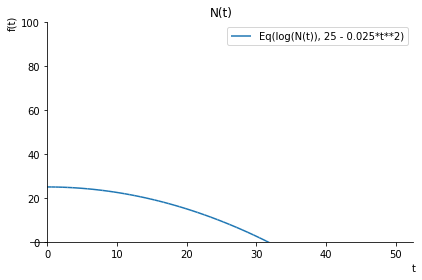

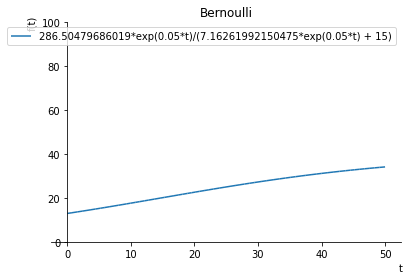

In [6]:
plot_model('free_growth_model')
plot_model('limited_growth_model')